In [28]:
from matplotlib import pyplot as plt
from pandas import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams["figure.figsize"] = (10,8)
# plt.style.use(['science' , 'notebook', 'grid'])

## Introdução

Nesse jupyter notebook estamos trabalhando com detecções de aglomerados simulados.
Há uma tabela de aglomerados simulados que foram inseridos em um campo estelar, e outra tabela
de detecções, onde já foi feito um match posicional entre os aglomerados simulados e os detectados.
Abaixo são lidas as informações a respeito apenas das detecções.

Nessa rodada foram simulados 66 aglomerados globulares com perfil de densidade exponencial, sendo que cada aglomerado está localizado no centro de um pixel do HealPix com nside=64, com a distância entre um aglomerado e outro ~1 grau e raio de meia luz de ~1 arcmin.

Abaixo são lidas as informações a respeito apenas das detecções.

In [29]:
RA, DEC, wrad, DistDet_kpc, m_M_det, SNR, wave_peak, \
Dist2object_arcmin, hlr_times_3_arcmin, SNR_rank, \
Wave_r3, DistSimulation_kpc, m_M_simulation, M_m_Det_minus_Sim, \
SNR_est = np.loadtxt('Planilhadetecção.txt', usecols=(1,2,3,4,5,6,7,9,10,12,13,14,16,17,18), unpack=True)

In [30]:
Name, Class = np.loadtxt('Planilhadetecção.txt', usecols=(8, 11), dtype=str, unpack=True)

In [31]:
N, HPX64, N0_order = np.loadtxt('Planilhadetecção.txt', usecols=(0, 15, 19), dtype=int, unpack=True)

Abaixo é criada uma condicional onde os aglomerados deram match com os simulados (confirmados)
e onde os aglomerados são apenas candidatos.

In [32]:
real_det = (Class == 'conf')
false_positive = (Class == 'cand')

Abaixo podemos ver a distribuição no céu destes aglomerados detectados. Os que estão em
azul são os aglomerados simulados, e aqueles em vermelho são os candidatos.

Text(0.5, 1.0, 'Spatial distribution of clusters detected by Gawa wrt SNR')

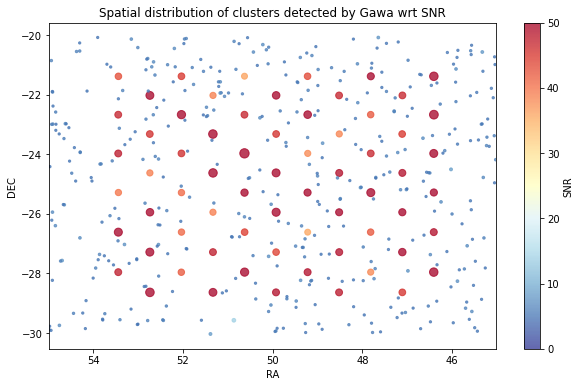

In [33]:
cm = plt.cm.get_cmap('RdYlBu_r')
plt.figure(figsize=(10, 6))
sc = plt.scatter(RA, DEC, c= SNR, vmin=0, vmax=50,  s=SNR, cmap=cm, alpha=0.75)
plt.colorbar(sc,label = 'SNR')
plt.xlim(np.max(RA), np.min(RA))
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Spatial distribution of clusters detected by Gawa wrt SNR')


Podemos notar que todos os aglomerados detectados e verdadeiros (True Positives) tem alta razão sinal-ruído (SNR),
enquanto que os com baixa SNR são falsos positivos (FP), sendo representados por círculos pequenos e azuis.

Importante destacar neste caso que todos os aglomerados simulados foram detectados. Pode haver casos onde 
nem todos os aglomerados simulados são detectados. Nesse caso, o código deve ler os aglomerados 
simulados novamente para ver o quão completa a detecção está.

## Pureza da distância de detecção

Abaixo vamos calcular a pureza da detecção dada a distância detectada.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


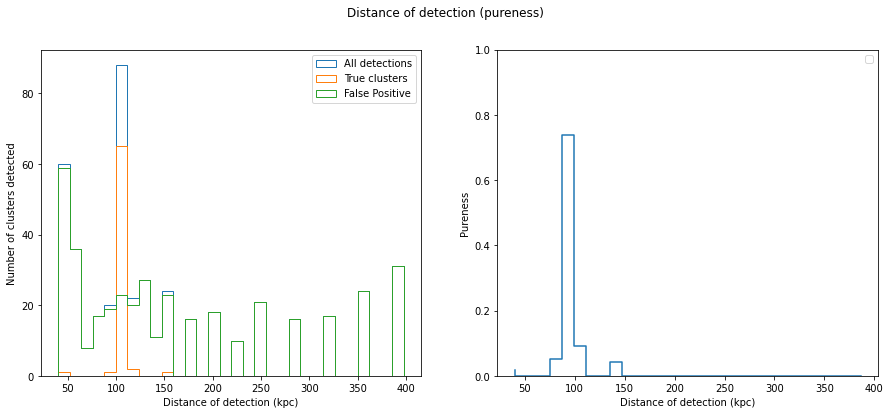

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distance of detection (pureness)')
A = ax1.hist(DistDet_kpc, bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label='All detections')
B = ax1.hist(DistDet_kpc[real_det], bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label='True clusters')
C = ax1.hist(DistDet_kpc[false_positive], bins=30, range=(np.min(DistDet_kpc), np.max(DistDet_kpc)), histtype='step', label='False Positive')
pureness = B[0] / A[0]
ax1.set_xlabel('Distance of detection (kpc)')
ax1.set_ylabel('Number of clusters detected')
ax1.legend()

ax2.step(A[1][0:-1], np.nan_to_num(pureness))
ax2.set_xlabel('Distance of detection (kpc)')
ax2.set_ylabel('Pureness')
ax2.set_ylim([0,1])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


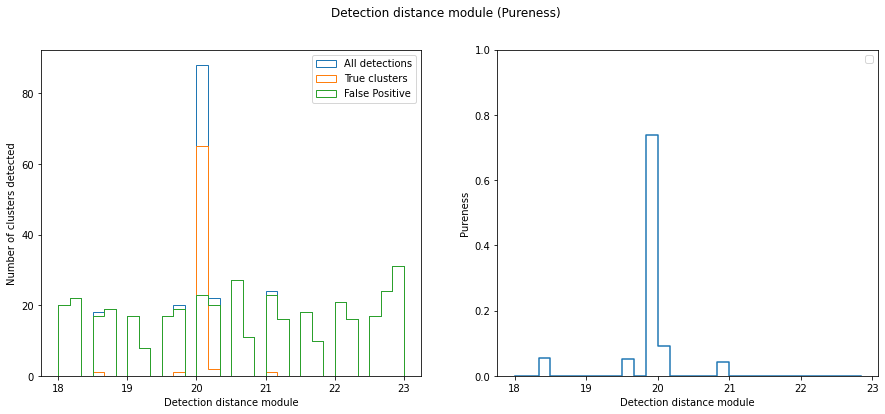

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Detection distance module (Pureness)')

A = ax1.hist(m_M_det, bins=30, range=(np.min(m_M_det), np.max(m_M_det)), histtype='step', label='All detections')
B = ax1.hist(m_M_det[real_det], bins=30, range=(np.min(m_M_det), np.max(m_M_det)), histtype='step', label='True clusters')
C = ax1.hist(m_M_det[false_positive], bins=30, range=(np.min(m_M_det), np.max(m_M_det)), histtype='step', label='False Positive')
pureness = B[0] / A[0]

ax1.set_xlabel('Detection distance module')
ax1.set_ylabel('Number of clusters detected')
ax1.legend()



ax2.step(A[1][0:-1], np.nan_to_num(pureness))
ax2.set_xlabel('Detection distance module')
ax2.set_ylabel('Pureness')
ax2.set_ylim([0,1])
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


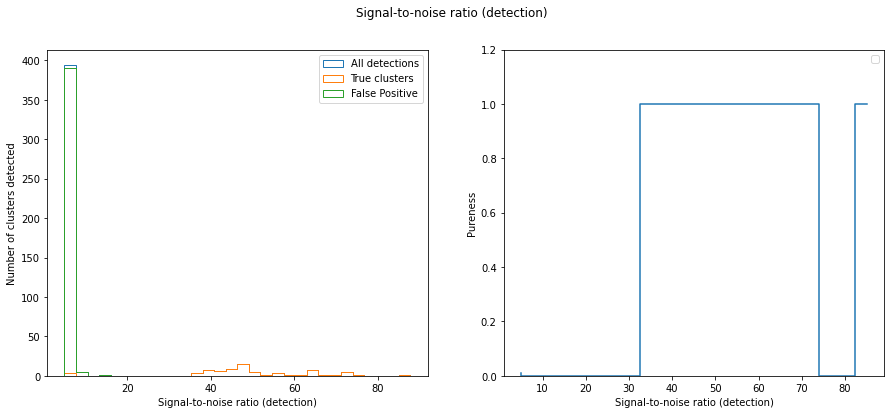

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Signal-to-noise ratio (detection)')

A = ax1.hist( SNR, bins=30, range=(np.min( SNR), np.max( SNR)), histtype='step', label='All detections')
B = ax1.hist( SNR[real_det], bins=30, range=(np.min( SNR), np.max( SNR)), histtype='step', label='True clusters')
C = ax1.hist( SNR[false_positive], bins=30, range=(np.min( SNR), np.max( SNR)), histtype='step', label='False Positive')
pureness = B[0] / A[0]

ax1.set_xlabel('Signal-to-noise ratio (detection)')
ax1.set_ylabel('Number of clusters detected')
ax1.legend()

ax2.step(A[1][0:-1], np.nan_to_num(pureness))
ax2.set_xlabel('Signal-to-noise ratio (detection)')
ax2.set_ylabel('Pureness')
ax2.set_ylim([0,1.2])

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


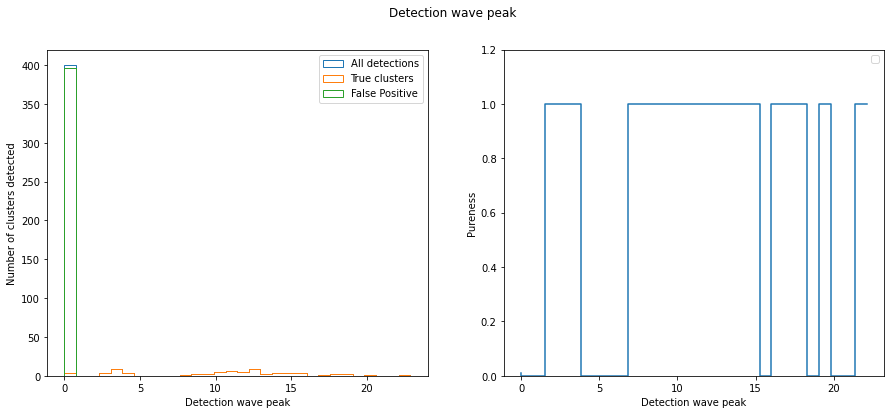

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Detection wave peak')

A = ax1.hist(wave_peak, bins=30, range=(np.min(wave_peak), np.max(wave_peak)), histtype='step', label='All detections')
B = ax1.hist(wave_peak[real_det], bins=30, range=(np.min(wave_peak), np.max(wave_peak)), histtype='step', label='True clusters')
C = ax1.hist(wave_peak[false_positive], bins=30, range=(np.min(wave_peak), np.max(wave_peak)), histtype='step', label='False Positive')
pureness = B[0] / A[0]

ax1.set_xlabel('Detection wave peak')
ax1.set_ylabel('Number of clusters detected')
ax1.legend()
ax2.step(A[1][0:-1], np.nan_to_num(pureness))
ax2.set_xlabel('Detection wave peak')
ax2.set_ylabel('Pureness')
ax2.set_ylim([0,1.2])

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


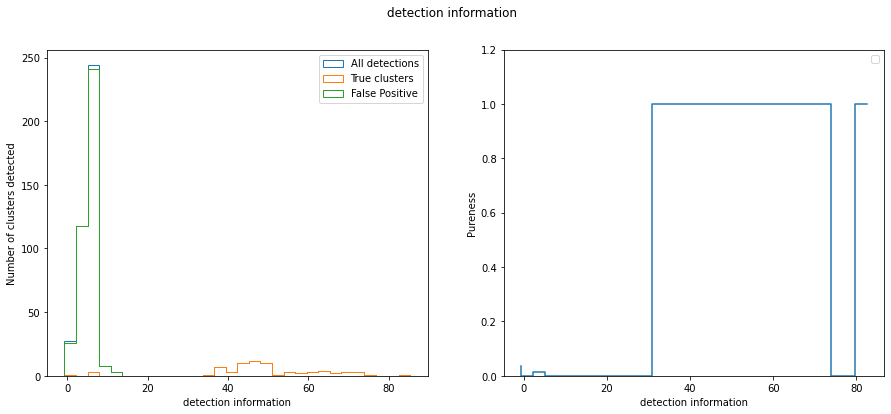

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('detection information')

A = ax1.hist(SNR_rank, bins=30, range=(np.min(SNR_rank), np.max(SNR_rank)), histtype='step', label='All detections')
B = ax1.hist(SNR_rank[real_det], bins=30, range=(np.min(SNR_rank), np.max(SNR_rank)), histtype='step', label='True clusters')
C = ax1.hist(SNR_rank[false_positive], bins=30, range=(np.min(SNR_rank), np.max(SNR_rank)), histtype='step', label='False Positive')
pureness = B[0] / A[0]

ax1.set_xlabel('detection information')
ax1.set_ylabel('Number of clusters detected')
ax1.legend()

ax2.step(A[1][0:-1], np.nan_to_num(pureness))
ax2.set_xlabel('detection information')
ax2.set_ylabel('Pureness')
ax2.set_ylim([0,1.2])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


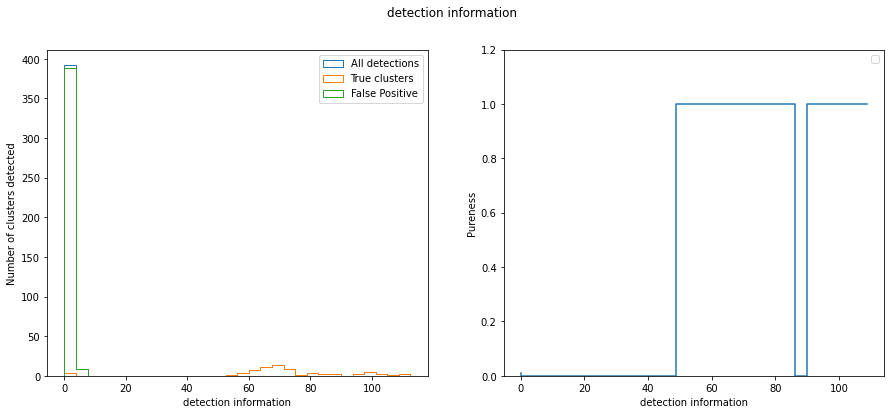

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('detection information')

A = ax1.hist(Wave_r3, bins=30, range=(np.min(Wave_r3), np.max(Wave_r3)), histtype='step', label='All detections')
B = ax1.hist(Wave_r3[real_det], bins=30, range=(np.min(Wave_r3), np.max(Wave_r3)), histtype='step', label='True clusters')
C = ax1.hist(Wave_r3[false_positive], bins=30, range=(np.min(Wave_r3), np.max(Wave_r3)), histtype='step', label='False Positive')
pureness = B[0] / A[0]

ax1.set_xlabel('detection information')
ax1.set_ylabel('Number of clusters detected')
ax1.legend()

ax2.step(A[1][0:-1], np.nan_to_num(pureness))
ax2.set_xlabel('detection information')
ax2.set_ylabel('Pureness')
ax2.set_ylim([0,1.2])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


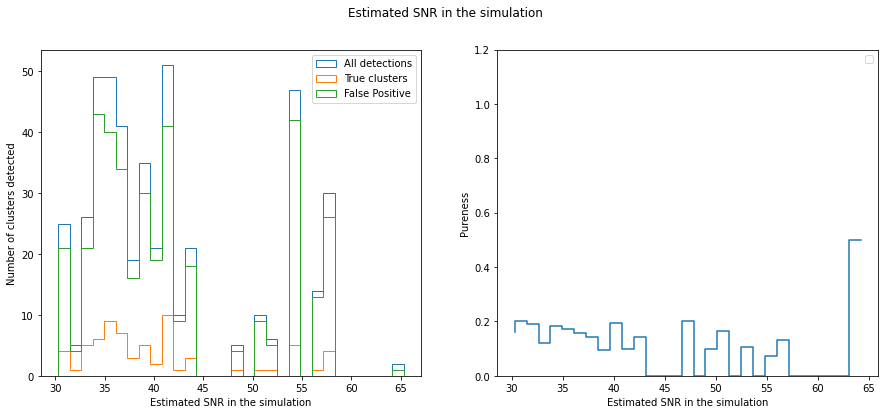

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Estimated SNR in the simulation')

A = ax1.hist(SNR_est, bins=30, range=(np.min(SNR_est), np.max(SNR_est)), histtype='step', label='All detections')
B = ax1.hist(SNR_est[real_det], bins=30, range=(np.min(SNR_est), np.max(SNR_est)), histtype='step', label='True clusters')
C = ax1.hist(SNR_est[false_positive], bins=30, range=(np.min(SNR_est), np.max(SNR_est)), histtype='step', label='False Positive')
pureness = B[0] / A[0]

ax1.set_xlabel('Estimated SNR in the simulation')
ax1.set_ylabel('Number of clusters detected')
ax1.legend()

ax2.step(A[1][0:-1], np.nan_to_num(pureness))
ax2.set_xlabel('Estimated SNR in the simulation')
ax2.set_ylabel('Pureness')
ax2.set_ylim([0,1.2])
plt.legend()
plt.show()

In [22]:
pd.read_csv('simulacao.txt', sep=',')

,# N\tipix\tNstar\tM_V\tSNR\tL\tB\tRA_pix\tDEC_pix\tr_exp\tellpa\tmass\tdist
0,35934\t11670\t-8.54\t6980.01\t224.9017\t-54.88...
1,35935\t12880\t-8.62\t8221.57\t223.8905\t-54.17...
2,35949\t11765\t-8.55\t7760.97\t224.1263\t-58.56...
3,35950\t12834\t-8.66\t8609.50 223.8880\t-59.790...
4,35951\t10998\t-8.48\t6888.75 222.6922\t-59.103...
...,...
61,36234\t11780\t-8.55\t7574.74 211.9017\t-57.284...
62,36235\t11573\t-8.53\t7823.27 211.1203\t-56.473...
63,36236\t12833\t-8.64\t8419.60 211.8088\t-55.222...
64,36240\t12622\t-8.62\t8920.58 213.1195\t-52.719...


In [23]:
Nstar, M_V, SNR, L, B, RA_pix, DEC_pix, r_exp, ellpa, mass, dist = np.loadtxt('simulacao.txt', usecols=(2,3,4,5,6,7,8,9,10,11,12) , unpack=True)

In [24]:
N, ipix = np.loadtxt('simulacao.txt', usecols=(0, 1), dtype=int, unpack=True)

In [25]:
real_det = (Class == 'conf')
false_positive = (Class == 'cand')

Text(0, 0.5, 'Number of clusters detected')

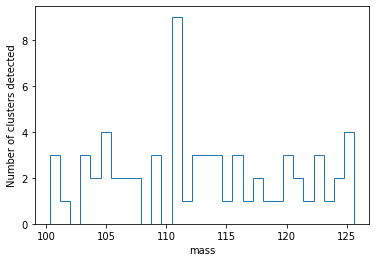

In [26]:
A = plt.hist(mass, bins=30, range=(np.min(mass), np.max(mass)), histtype='step', label='All detections')
plt.xlabel('mass')
plt.ylabel('Number of clusters detected')